In [2]:
%matplotlib inline

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS

from collections import OrderedDict

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want simulations to live?
analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure3-sims/"
try:
    ipyclient = ipp.Client(cluster_id="MESS-Rich")
    print(len(ipyclient))
except:
    pass

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-MESS-Rich-client.json


## Figure 3 - Summaries of distributions through time
![Figure3 Cartoon](files/Fig3-mockup.png "MESS Figure 3 Cartoon")

## Generate simulations for figure 3
Here we fix all parameters except speciation rate and community assembly model. Generate 1000 simulations for each of the configurations (hi, lo, no speciation) and (neut, filt, comp) assembly.

In [ ]:
r = MESS.Region("figure3")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", 2000)

## Metacommunity Params
r.set_param("S_m", 500)
r.set_param("J_m", 750000)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", 5)

## Local Params
r.set_param("J", 1000)
r.set_param("m", 0.005)
r.set_param("background_death", 0.25)

for model in ["neutral", "filtering", "competition"]:
    for sp_prob in [0, 0.0001, 0.001]:
        r.set_param("community_assembly_model", model)
        r.set_param("speciation_prob", sp_prob)
        r.write_params(outfile="params-fig3-{}-sp{}.txt".format(model, sp_prob), force=True)
        #r.run(sims=1000, ipyclient=ipyclient)

    Generating 1000 simulation(s).
  [######              ]  31%  Performing Simulations    | 0:05:06 | 

## Generate the figure

In [33]:
neutral_df = pd.read_csv(analysis_dir + "SIMOUT.txt", sep="\t", header=0)
non_neutral_df = pd.read_csv(analysis_dir + "non-neutral-SIMOUT.txt", sep="\t", header=0)
non_neutral_df[:2]


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,background_death,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_dxy_cor,abundance_pi_cor,pi_trait_cor,dxy_abundance_cor,dxy_trait_cor,abundance_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,500,750000,2.0,0.7,2.0,5.0,0.0,filtering,point_mutation,0.0,2000,570.0,1000.0,0.005,0.0000,0.25,17.0,0.485,0.00447,0.00176,0.58824,6.51938,11.0,2.83174,2.44236,2.31428,2.24347,4.63513,4.24706,3.89980,3.62980,0.00020,0.00025,1.09031,0.38060,0.0,0.00035,0.00195,0.00178,1.12828,0.59001,0.00088,0.00219,0.0,3.01919,2.61430,2.49716,2.44000,2.13475,3.55132,-0.01692,-1.19162,2.29319,5.37212,1.20416,3.33048,-0.04921,-0.36176,1.12583,4.44778,-0.93059,-0.22083,-0.03230,0.82987,-1.16736,-0.92434,0.02572,0.15284,-0.28031,0.23012,-0.04587,0.26767,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
1,500,750000,2.0,0.7,2.0,5.0,0.0,filtering,point_mutation,0.0,2000,570.0,1000.0,0.005,0.0001,0.25,18.0,0.603,0.00544,0.00356,0.58824,0.83177,7.0,2.95328,2.74784,2.66205,2.60967,2.88169,2.76555,2.66021,2.57074,0.00019,0.00023,0.70236,-1.00391,0.0,0.00035,0.00231,0.00446,1.97963,2.02815,0.00018,0.00123,0.0,2.90183,2.71857,2.64446,2.59813,-1.83503,2.21656,-0.14616,-1.22218,-1.65775,2.96523,-1.63627,2.82373,0.32049,0.01019,-1.64591,3.94376,0.19876,0.60718,0.46665,1.23237,0.01184,0.97854,0.85201,0.31009,0.71714,0.60388,-0.49099,-0.22237,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [16]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_sumstats_through_time(sim_df, scatter=True, normalize_hills=False):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.001, 0.0001, 0])):
        x = sim_df.loc[sim_df["speciation_prob"] == spec_prob]["_lambda"]
        #import pdb; pdb.set_trace()
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats]:
                y = sim_df.loc[sim_df["speciation_prob"] == spec_prob]
                ## Plotting
                if normalize_hills and not stat == "S":
                    y = y[stat]/y["S"]
                else:
                    y = y[stat]
                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.05, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(sumstats)
                axs[i][j].set_ylabel(spec_label)
                #axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()


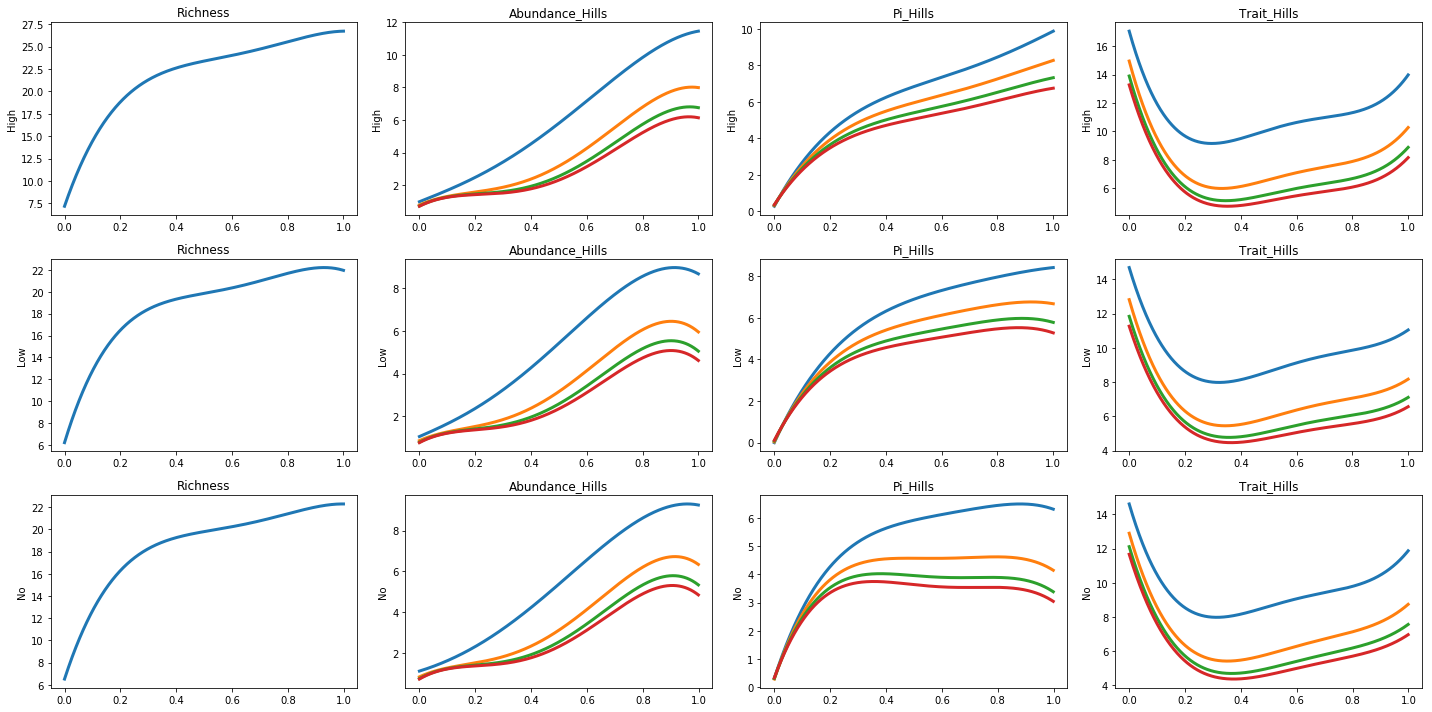

In [17]:
plot_sumstats_through_time(neutral_df, scatter=False, normalize_hills=False)

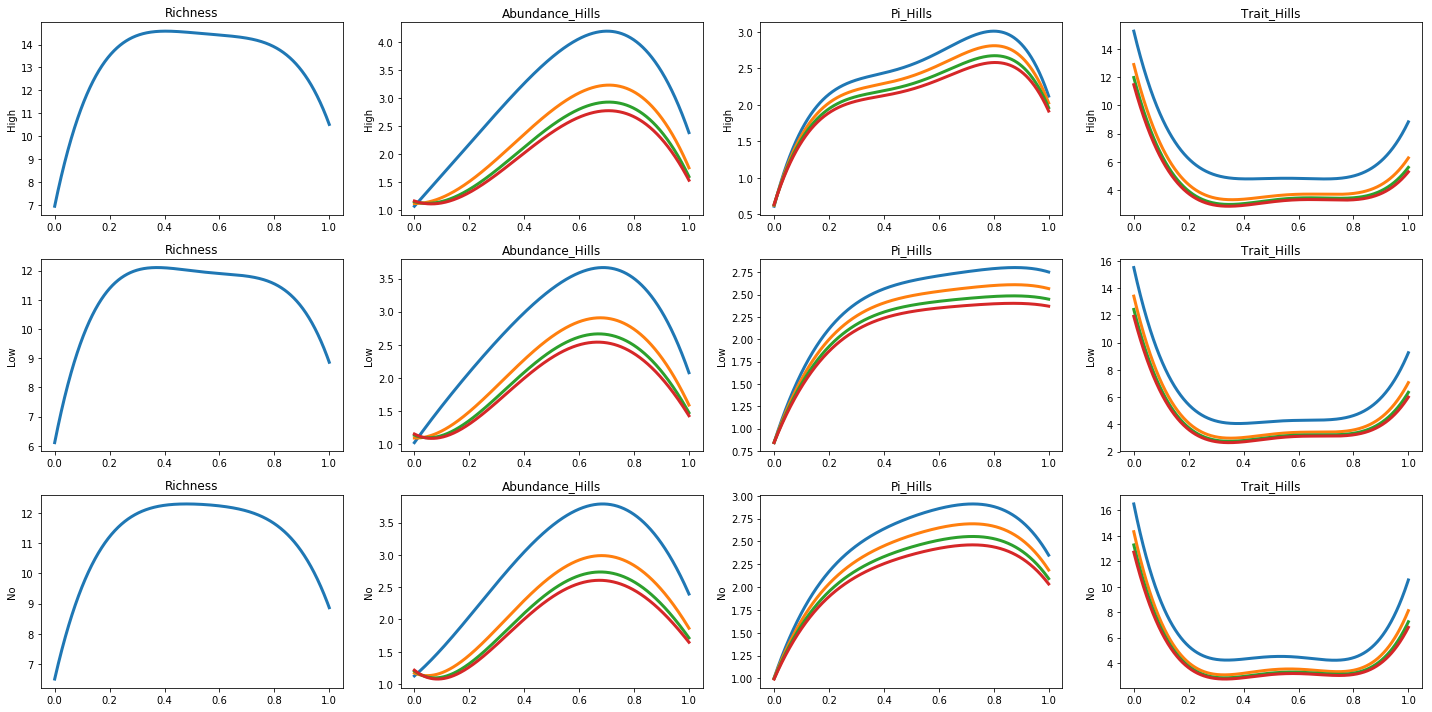

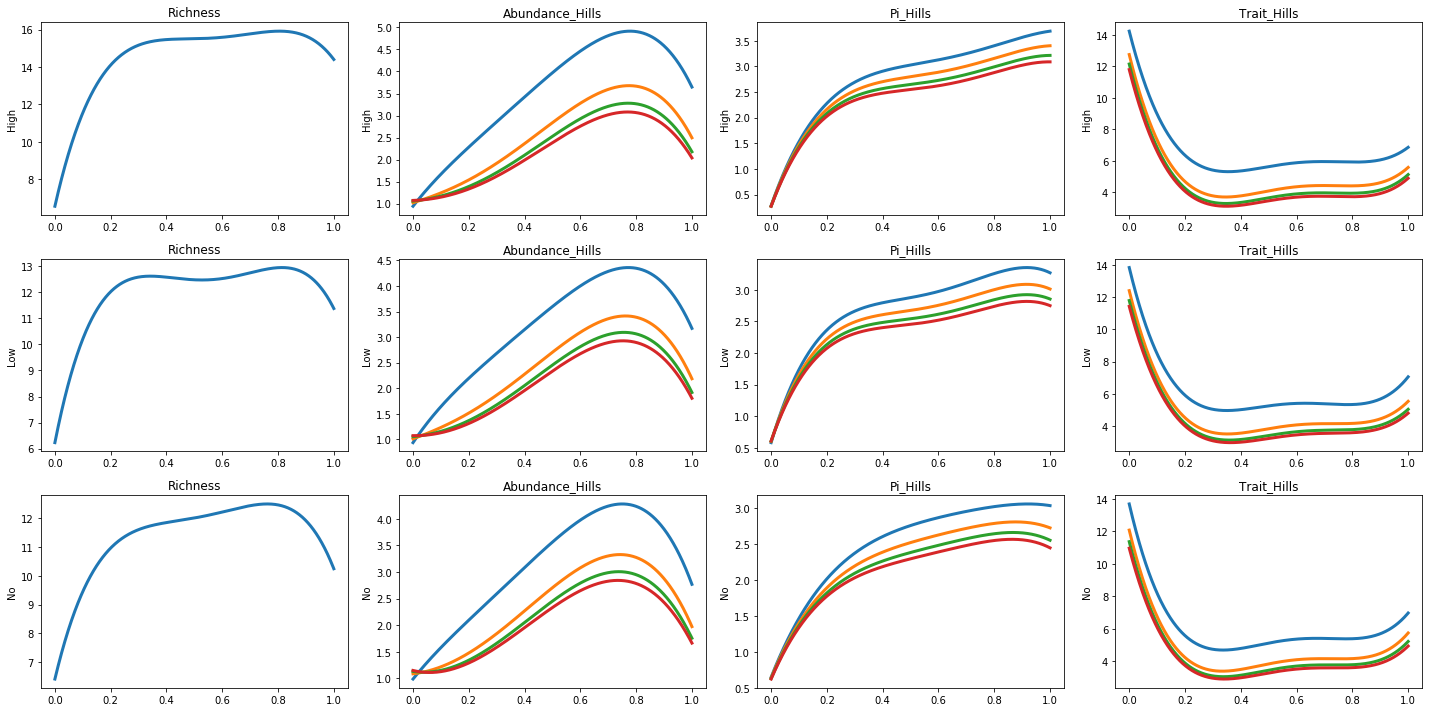

In [14]:
filt_sims = non_neutral_df.loc[non_neutral_df["community_assembly_model"] == "filtering"]
comp_sims = non_neutral_df.loc[non_neutral_df["community_assembly_model"] == "competition"]
plot_sumstats_through_time(filt_sims, scatter=False, normalize_hills=False)
plot_sumstats_through_time(comp_sims, scatter=False, normalize_hills=False)

## Plot all assembly models on one figure.
Too crazy?

/home/isaac/miniconda2/envs/MESS/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


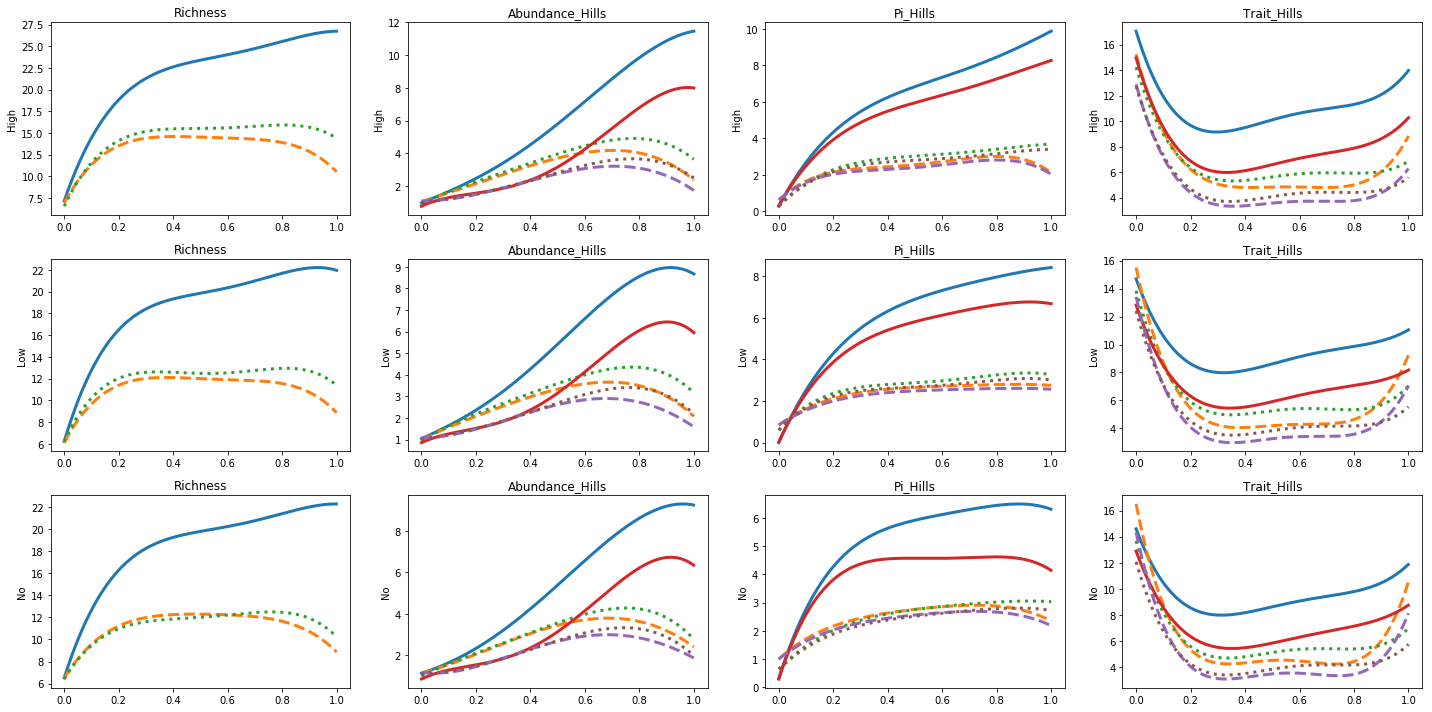

In [20]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

full_df = pd.concat([neutral_df, non_neutral_df])

def plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=2):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.001, 0.0001, 0])):
        
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats][:n_hills]:
                for model, ls in zip(["neutral", "filtering", "competition"],\
                                     ["solid", "dashed", "dotted"]):
                    x = sim_df.loc[sim_df["community_assembly_model"] == model]
                    x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                    y = sim_df.loc[sim_df["community_assembly_model"] == model]
                    y = y.loc[y["speciation_prob"] == spec_prob]
                    
                    ## Plotting
                    if normalize_hills and not stat == "S":
                        y = y[stat]/y["S"]
                    else:
                        y = y[stat]
                    z = np.poly1d(np.polyfit(x,y,4))
                    xs_z = np.linspace(0, max(x), 1000)
                    if scatter: axs[i][j].scatter(x, y, alpha=0.05, marker='.')
                    axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3, ls=ls)

                    ## Labeling and cleaning up the plots
                    axs[i][j].set_title(sumstats)
                    axs[i][j].set_ylabel(spec_label)
                    #axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()
plot_combined_sumstats_through_time(full_df, scatter=False, normalize_hills=False, n_hills=2)

## Prototyping

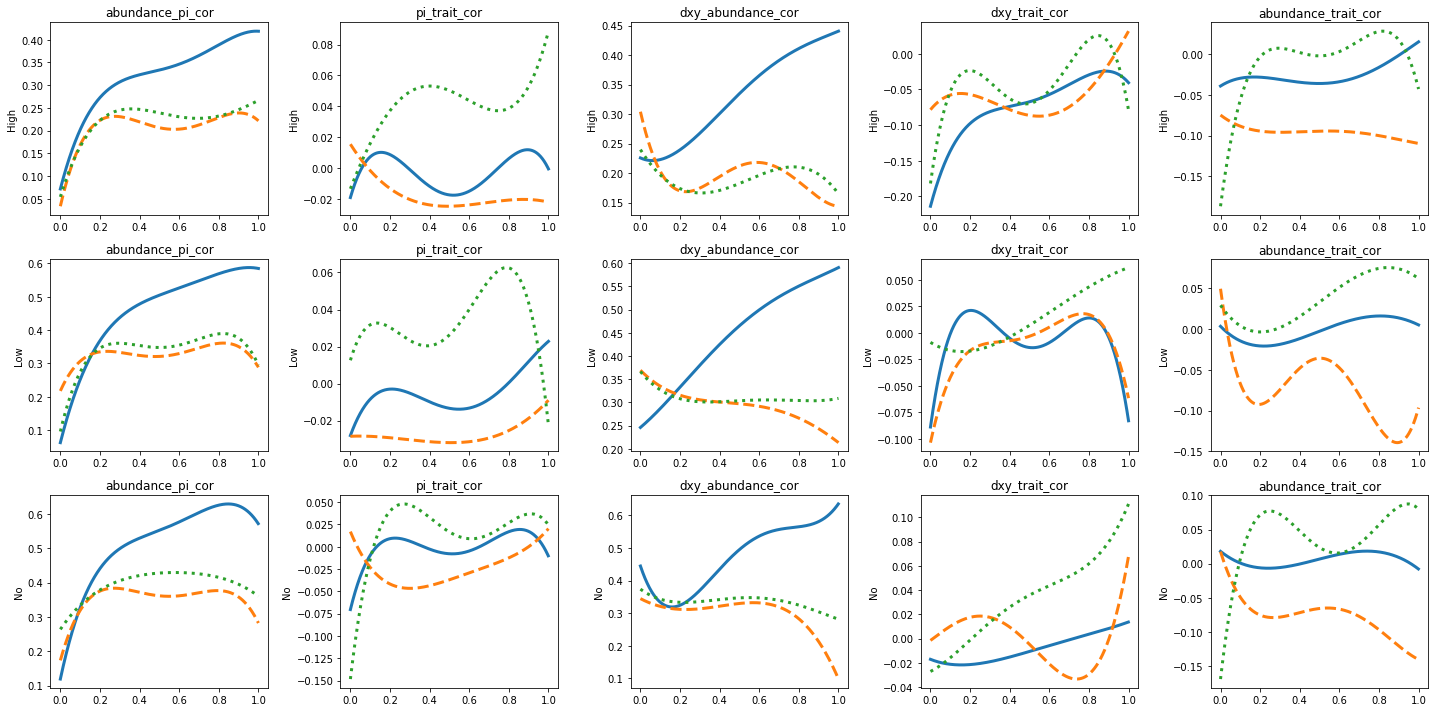

In [38]:
full_df = pd.concat([neutral_df, non_neutral_df])
cors = ["abundance_pi_cor", "pi_trait_cor",\
"dxy_abundance_cor", "dxy_trait_cor", "abundance_trait_cor"]

def plot_correlations_through_time(sim_df, scatter=True):
    ## Get min and max y values so the y values can be scaled identically w/in columns

    fig, axs = plt.subplots(3, 5, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.001, 0.0001, 0])):
        
        for j, cor in enumerate(cors):
            for model, ls in zip(["neutral", "filtering", "competition"],\
                                 ["solid", "dashed", "dotted"]):
                x = sim_df.loc[sim_df["community_assembly_model"] == model]
                x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                y = sim_df.loc[sim_df["community_assembly_model"] == model]
                y = y.loc[y["speciation_prob"] == spec_prob][cor]

                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.05, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=model, lw=3, ls=ls)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(cor)
                axs[i][j].set_ylabel(spec_label)
    plt.tight_layout()
plot_correlations_through_time(full_df, scatter=False)

(array([23., 15., 26., 23.,  6., 18., 21., 25., 18., 22.]),
 array([0.0041 , 0.00428, 0.00446, 0.00464, 0.00482, 0.005  , 0.00518,
        0.00536, 0.00554, 0.00572, 0.0059 ]),
 <a list of 10 Patch objects>)

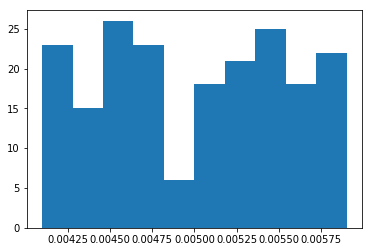

In [10]:
## Using toy data crib'd from another set of simulations
sim_df = pd.read_csv("/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt", sep="\t", header=0)
sim_df.sort_values(by=['_lambda'])
sim_df = sim_df[np.logical_and(sim_df["m"] > 0.004, sim_df["m"] < 0.006)]
plt.hist(sim_df["m"])

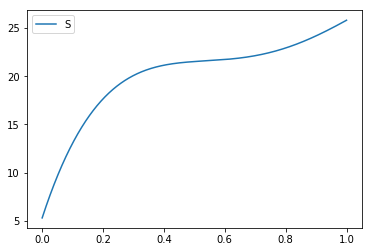

In [44]:
stat = "S"
x = sim_df["_lambda"]
y = sim_df[stat]
z = np.poly1d(np.polyfit(x,y,4))
xs_z = np.linspace(0, 1, 1000)
#plt.scatter(sim_df["_lambda"], sim_df["S"])
plt.plot(xs_z, z(xs_z), label=stat)
plt.legend()

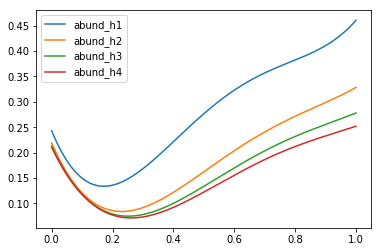

In [49]:
#for stat in ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]:
for stat in ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]:
#for stat in ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]:
    x = sim_df["_lambda"]
    y = sim_df[stat]/sim_df["S"]
    z = np.poly1d(np.polyfit(x,y,4))
    xs_z = np.linspace(0, 1, 1000)
    #plt.scatter(sim_df["_lambda"], sim_df["S"])
    plt.plot(xs_z, z(xs_z), label=stat)
    plt.legend()